<a href="https://colab.research.google.com/github/lorarjohns/pose-estimation/blob/master/hpe_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!wget http://ufldl.stanford.edu/housenumbers/train_32x32.mat
!wget http://ufldl.stanford.edu/housenumbers/test_32x32.mat

--2020-03-06 03:32:57--  http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182040794 (174M) [text/plain]
Saving to: ‘train_32x32.mat’

train_32x32.mat     100%[===================>] 173.61M  16.7MB/s    in 14s     

2020-03-06 03:33:12 (12.0 MB/s) - ‘train_32x32.mat’ saved [182040794/182040794]

--2020-03-06 03:33:22--  http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64275384 (61M) [text/plain]
Saving to: ‘test_32x32.mat’

test_32x32.mat      100%[===================>]  61.30M  15.5MB/s    in 7.4s    

2020-03-06 03:33:29 (8.33 MB/s) - ‘test_32x32.mat’ saved [64275384/64

In [0]:
!mkdir data

In [0]:
import scipy.io as sio 

train = sio.loadmat("train_32x32.mat")

In [5]:
train.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [0]:
x_train = train['X']
y_train = train['y']

In [0]:
import numpy as np
import os
import binascii
import h5py
import PIL as pillow
from PIL import Image
from collections import defaultdict

import logging

In [10]:
type(x_train)

numpy.ndarray

In [0]:
import matplotlib.pylab as plt
import matplotlib.cm as cm
%matplotlib inline

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [80]:
x_train

array([[[[ 33,  84,  19, ...,  92, 190, 216],
         [ 30,  76,  54, ...,  78, 188, 217],
         [ 38,  59, 110, ..., 101, 191, 212]],

        [[ 15,  86,  20, ...,  94, 205, 221],
         [ 23,  73,  52, ...,  82, 203, 222],
         [ 19,  66, 111, ..., 105, 206, 217]],

        [[ 15,  77,  25, ..., 114, 220, 226],
         [ 17,  78,  57, ..., 101, 218, 227],
         [ 19,  56, 116, ..., 125, 220, 221]],

        ...,

        [[ 72,  90,  65, ..., 200, 229, 200],
         [ 65,  78, 144, ..., 201, 231, 199],
         [ 56,  69, 223, ..., 203, 224, 191]],

        [[ 82,  88,  78, ..., 192, 229, 193],
         [ 77,  77, 148, ..., 193, 229, 188],
         [ 57,  67, 218, ..., 195, 224, 182]],

        [[ 89,  88,  98, ..., 190, 229, 197],
         [ 79,  78, 158, ..., 191, 228, 189],
         [ 59,  66, 220, ..., 193, 223, 186]]],


       [[[ 28,  85,  21, ...,  92, 183, 204],
         [ 39,  77,  53, ...,  78, 182, 205],
         [ 35,  61, 110, ..., 103, 186, 202]],

    

In [0]:
def preprocess(dataset, features, labels, target_path):
  '''
  dataset: train or test
  features: X
  labels: y
  target_path: save file
  '''
  images = []
  lab = []

  size = features.shape[3]

  label_count = defaultdict(int)

  for i in range(size):
    label = labels[i][0]
    lab.append(label)

    #count = 0
    #if label in label_count:
    label_count[label] += 1
    #else:
    #  label_count[label] = 

    filename = binascii.hexlify(os.urandom(6//2)).decode()
    filename = f"{dataset}_{filename}_{label}_{label_count[label]}.png"
    filepath = os.path.join(target_path, filename)

    image = Image.fromarray(features[:,:,:,i])

    #if grayscale:
    #  image = image.convert("L")
    #else:
    image = image.convert("RGB")
    image.save(filepath)

    if i % 1000 == 0 or i == 1:
      logging.info(f"Step {i}: saved {filename}.")
    
    images.append(image)

  return images, lab

In [98]:
im, lab = preprocess('train', x_train, y_train, "./data")

label: [3]


label: [3]


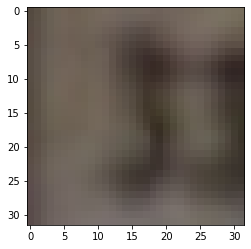

In [99]:
print(f"label: {y_train[10]}")
plt.imshow(im[10])

1


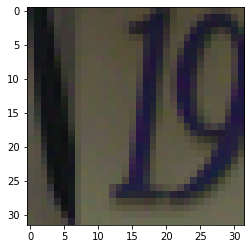

9


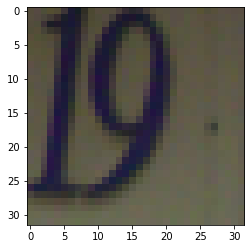

2


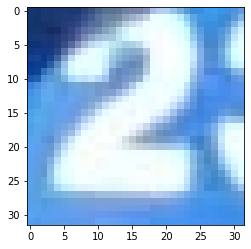

3


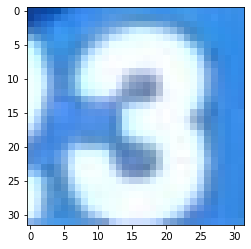

2


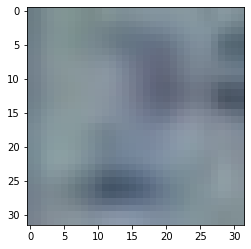

5


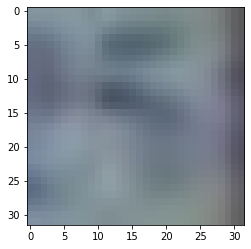

9


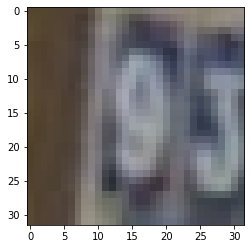

3


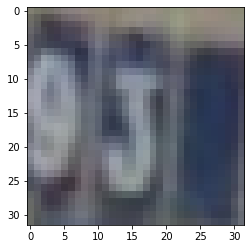

3


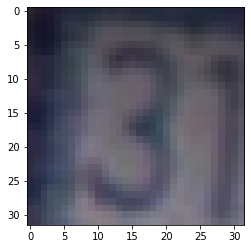

1


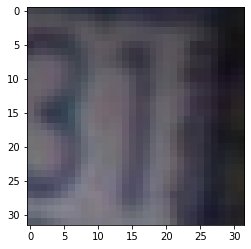

In [107]:
f, ax = plt.subplots()
for i in range(10):
  print(lab[i])
  plt.imshow(im[i])
  plt.show()

In [93]:
y_train.shape

(73257, 1)

In [0]:
image = Image.open('data/train_000047_9_5508.png')
image = np.array(image)

In [40]:
y_train[10].shape

(1,)

In [0]:
#image. format, mode, size

In [0]:
# Important Note: Digit “0” has label 10. Replace all the labels “10“ with label “0”

# mask = np.where(y_train == 10)

y_train_0 = np.where(y_train !=10, y_train, 0)

In [0]:
np.where(y_train_0 == 0)[0] # == np.where(y_train == 10)[0]

In [0]:
'''
train2017 folder: training images
val2017 folder: validation images
annotations/person_keypoints_train2017.json: keypoint and bounding box information for the training images
annotations/person_keypoints_val2017.json: keypoint and bounding box information for the validation images
'''

In [0]:
# !pip install gluoncv mxnet
# !curl https://gluon-cv.mxnet.io/_downloads/b6ade342998e03f5eaa0f129ad5eee80/mscoco.py > mscoco.py
!python mscoco.py --download-dir="/content/drive/My Drive/Data/COCO/"
from matplotlib import pyplot as plt
from gluoncv import data, utils


train_dataset = data.COCODetection(splits=['instances_train2017'])
val_dataset = data.COCODetection(splits=['instances_val2017'])
print('Num of training images:', len(train_dataset))
print('Num of validation images:', len(val_dataset))

 13% 2457490/18883654 [03:54<25:34, 10704.65KB/s]

In [142]:
train_image, train_label = train_dataset[0]
bounding_boxes = train_label[:, :4]
class_ids = train_label[:, 4:5]
print('Image size (height, width, RGB):', train_image.shape)
print('Num of objects:', bounding_boxes.shape[0])
print('Bounding boxes (num_boxes, x_min, y_min, x_max, y_max):\n',
      bounding_boxes)
print('Class IDs (num_boxes, ):\n', class_ids)

utils.viz.plot_bbox(train_image.asnumpy(), bounding_boxes, scores=None,
                    labels=class_ids, class_names=train_dataset.classes)
plt.show()

NameError: ignored